In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `hpcc`

In [2]:
hpcc_raw = pd.read_csv('hpcc - cleaner.csv')
hpcc_raw.rename(columns={'RUN':'metric'}, inplace=True)


## compute metrics

In [3]:

compute_metrics = ['HPL_Gflops','StarDGEMM_Gflops','SingleDGEMM_Gflops','StarFFT_Gflops','SingleFFT_Gflops','MPIFFT_Gflops']

hpcc_raw['metric'] = hpcc_raw['metric'].replace(
    {m: m.replace('_Gflops', '') for m in compute_metrics}
)

In [4]:
hpcc_raw['metric']
compute_metrics = ['HPL','StarDGEMM','SingleDGEMM','StarFFT','SingleFFT','MPIFFT']

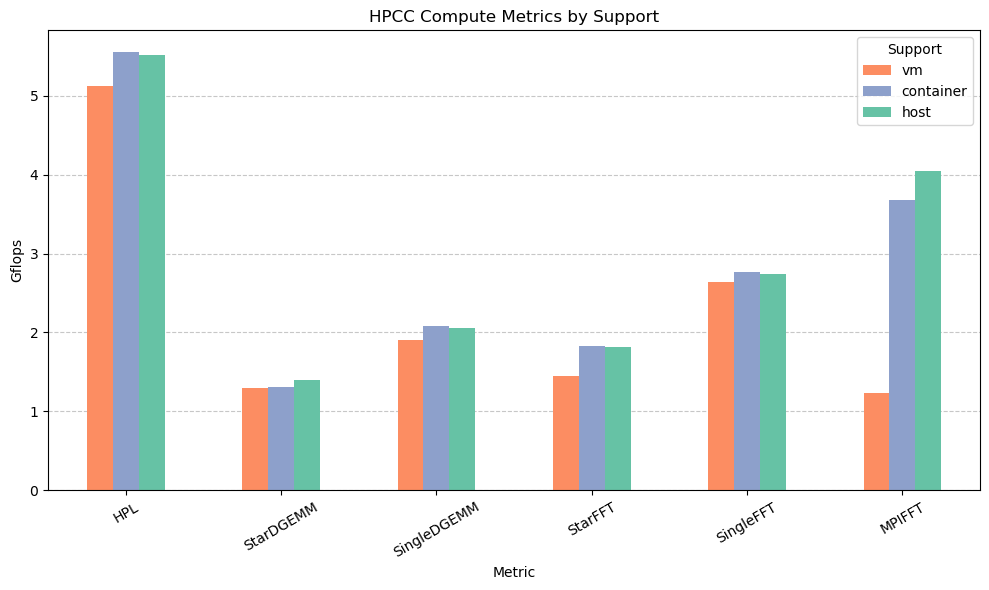

In [5]:
compute_df = hpcc_raw[hpcc_raw['metric'].isin(compute_metrics)]

# Set metric as index for plotting
compute_df_plot = compute_df.set_index('metric')[['vm', 'container', 'host']]

palette = sns.color_palette("Set2", 3)
# Plot

fig, ax = plt.subplots(figsize=(10, 6))
compute_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Compute Metrics by Support')
ax.set_ylabel('Gflops')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()


## memory and bandwidth

In [6]:
hpcc_raw['metric']

0                                      HPL
1                                StarDGEMM
2                              SingleDGEMM
3                                  StarFFT
4                                SingleFFT
5                                   MPIFFT
6                                      NaN
7                   StarSTREAM_Copy (GB/s)
8                         StarSTREAM_Scale
9                           StarSTREAM_Add
10                        StarSTREAM_Triad
11                       SingleSTREAM_Copy
12                      SingleSTREAM_Scale
13                        SingleSTREAM_Add
14                      SingleSTREAM_Triad
15                              PTRANS_GBs
16                MPIRandomAccess_LCG_GUPs
17                    MPIRandomAccess_GUPs
18               StarRandomAccess_LCG_GUPs
19             SingleRandomAccess_LCG_GUPs
20                   StarRandomAccess_GUPs
21                 SingleRandomAccess_GUPs
22                                     NaN
23     Rand

In [7]:
star_stream_metrics = ['StarSTREAM_Copy (GB/s)','StarSTREAM_Scale', 'StarSTREAM_Add','StarSTREAM_Triad']
single_stream_metrics = ['SingleSTREAM_Copy', 'SingleSTREAM_Scale', 'SingleSTREAM_Add', 'SingleSTREAM_Triad']

ptrans_metric = ['PTRANS_GBs']


In [8]:
stream_df = hpcc_raw[hpcc_raw['metric'].isin(star_stream_metrics + single_stream_metrics)]

# renaming the metrics for plotting
stream_df['metric'] = stream_df['metric'].replace(
    {m: m.replace('StarSTREAM_', 'Star ') for m in stream_df['metric']}
)
stream_df['metric'] = stream_df['metric'].replace(
    {m: m.replace('SingleSTREAM_', 'Single ') for m in stream_df['metric']}
)
stream_df['metric'] = stream_df['metric'].replace('Star Copy (GB/s)','Star Copy')
stream_df

/tmp/ipykernel_61938/418983220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_df['metric'] = stream_df['metric'].replace(
/tmp/ipykernel_61938/418983220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_df['metric'] = stream_df['metric'].replace(
/tmp/ipykernel_61938/418983220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,metric,vm,container,host
7,Star Copy,5.033903,5.406483,5.388747
8,Star Scale,3.342773,3.553517,3.560480
9,Star Add,3.753100,4.075677,4.070387
10,Star Triad,3.722077,4.022163,3.999820
11,Single Copy,22.298533,24.109567,23.444100
12,Single Scale,13.261367,14.231300,14.058467
13,Single Add,14.398333,15.380100,15.062733
14,Single Triad,14.435533,15.475833,15.217567


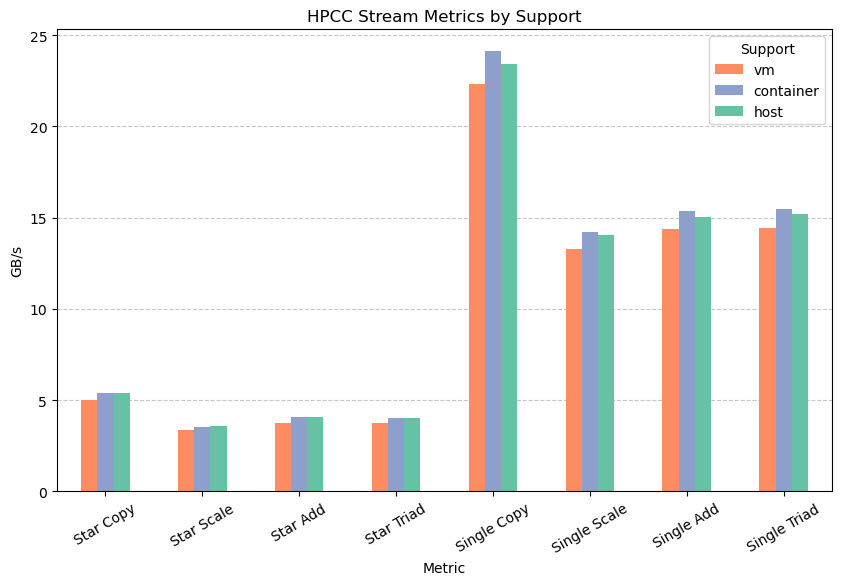

In [9]:
# Plot
# Set metric as index for plotting
stream_df_plot = stream_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
stream_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Stream Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.show()


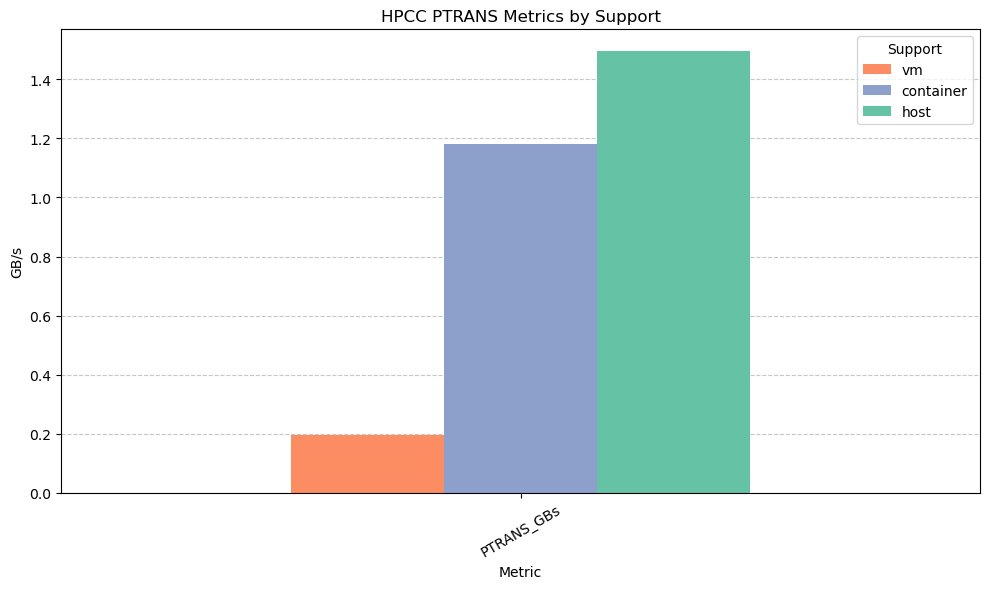

In [10]:
# Plot PTRANS
ptrans_df = hpcc_raw[hpcc_raw['metric'].isin(ptrans_metric)]
ptrans_df_plot = ptrans_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
ptrans_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC PTRANS Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

In [11]:
random_access_metric = ['MPIRandomAccess_LCG_GUPs', 'MPIRandomAccess_GUPs', 'StarRandomAccess_LCG_GUPs', 'SingleRandomAccess_LCG_GUPs', 'StarRandomAccess_GUPs', 'SingleRandomAccess_GUPs']

random_access_df = hpcc_raw[hpcc_raw['metric'].isin(random_access_metric)]

random_access_df

,metric,vm,container,host
16,MPIRandomAccess_LCG_GUPs,0.002246,0.002636,0.034254
17,MPIRandomAccess_GUPs,0.002285,0.002596,0.031582
18,StarRandomAccess_LCG_GUPs,0.005709,0.013855,0.014289
19,SingleRandomAccess_LCG_GUPs,0.023816,0.041920,0.047403
20,StarRandomAccess_GUPs,0.005535,0.013226,0.013213
21,SingleRandomAccess_GUPs,0.025557,0.044713,0.046886


In [39]:

# remove the '_GUPs' from the metric names for random access
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('_GUPs', '') for m in random_access_df['metric']}
)
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('RandomAccess_', ' ') for m in random_access_df['metric']}
)
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('RandomAccess', '') for m in random_access_df['metric']}
)

random_access_df['metric']

/tmp/ipykernel_61938/611903842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_access_df['metric'] = random_access_df['metric'].replace(
/tmp/ipykernel_61938/611903842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_access_df['metric'] = random_access_df['metric'].replace(
/tmp/ipykernel_61938/611903842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

16       MPI LCG
17          MPI 
18      Star LCG
19    Single LCG
20         Star 
21       Single 
Name: metric, dtype: object

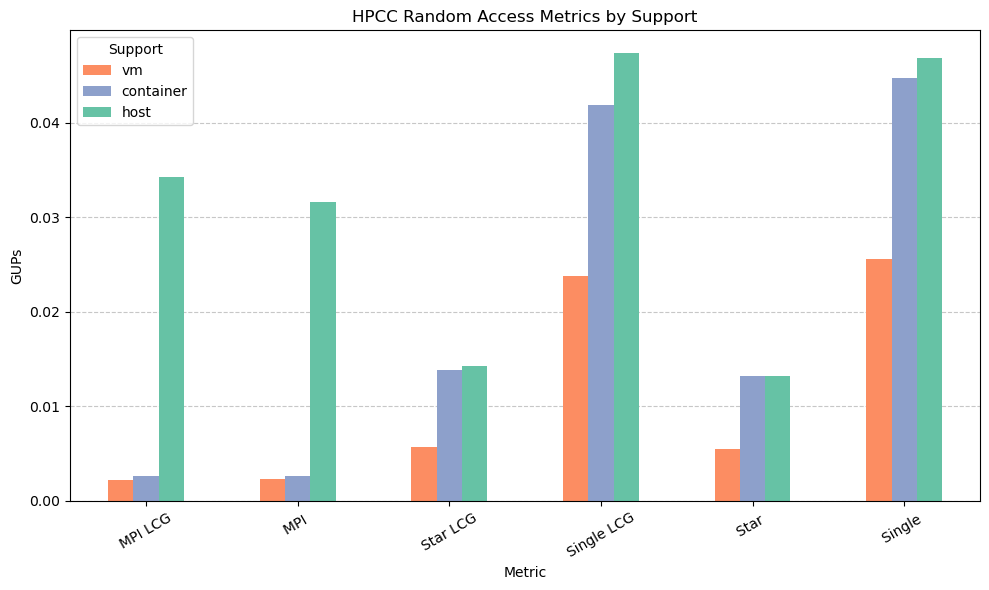

In [40]:
# Plot Random Access

random_access_df_plot = random_access_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
random_access_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Random Access Metrics by Support')
ax.set_ylabel('GUPs')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

## comunication (latency and bandwidth)

In [44]:
bandwidth_metric = ['RandomlyOrderedRingBandwidth_GBytes',
                    'NaturallyOrderedRingBandwidth_GBytes',
                    'MaxPingPongBandwidth_GBytes',
                    'AvgPingPongBandwidth_GBytes',
                    'MinPingPongBandwidth_GBytes']
bandwidth_df = hpcc_raw[hpcc_raw['metric'].isin(bandwidth_metric)]
bandwidth_df['metric'] = bandwidth_df['metric'].replace(
    {m: m.replace('Bandwidth_GBytes', '') for m in bandwidth_df['metric']}
)
bandwidth_df

/tmp/ipykernel_61938/3977989382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandwidth_df['metric'] = bandwidth_df['metric'].replace(


,metric,vm,container,host
23,RandomlyOrderedRing,0.119793,1.857003,2.970567
25,NaturallyOrderedRing,0.145474,2.063597,3.100710
27,MaxPingPong,11.382977,13.725733,13.908367
28,AvgPingPong,3.616830,7.943350,12.749900
29,MinPingPong,0.230330,4.995497,11.516867


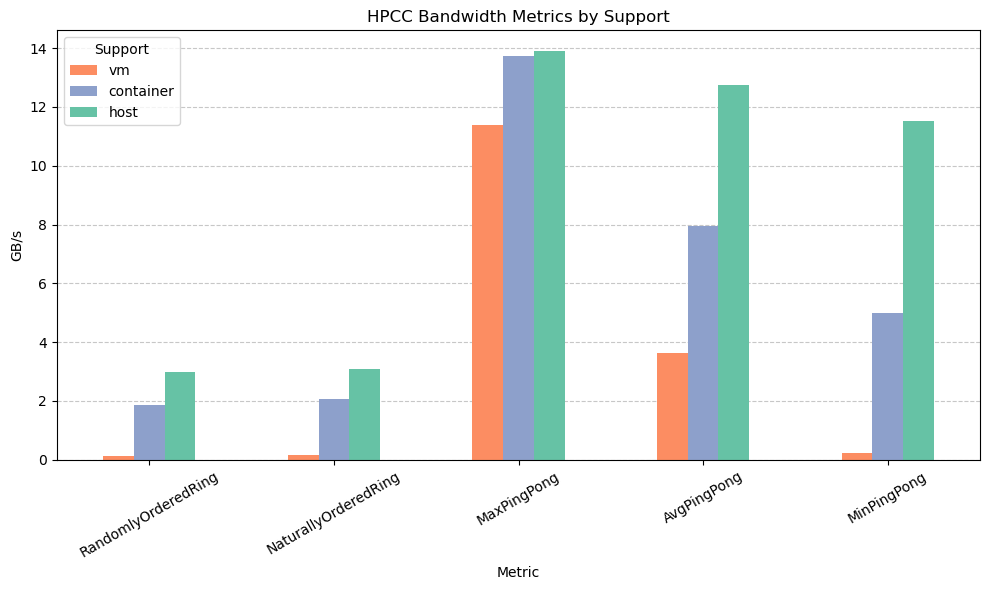

In [45]:
# plot bandwidth
bandwidth_df_plot = bandwidth_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
bandwidth_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Bandwidth Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

In [46]:
latency_metric = ['RandomlyOrderedRingLatency_usec',
'NaturallyOrderedRingLatency_usec',
'MaxPingPongLatency_usec',
'AvgPingPongLatency_usec',
'MinPingPongLatency_usec']
latency_df = hpcc_raw[hpcc_raw['metric'].isin(latency_metric)]
latency_df['metric'] = latency_df['metric'].replace(
    {m: m.replace('Latency_usec', '') for m in latency_df['metric']}
)

/tmp/ipykernel_61938/2572388156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latency_df['metric'] = latency_df['metric'].replace(


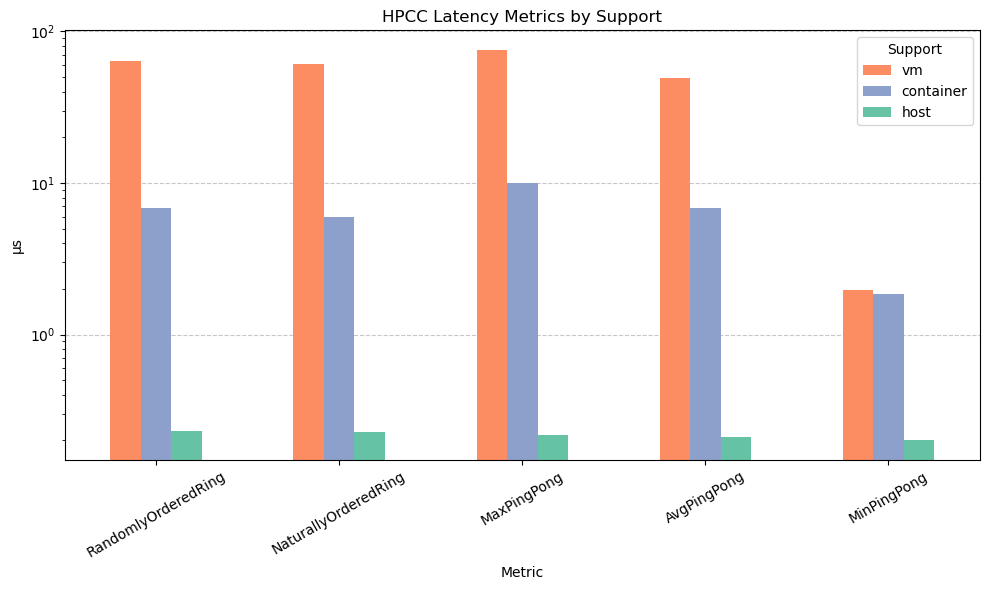

In [50]:
# plot latency
latency_df_plot = latency_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
latency_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Latency Metrics by Support')
ax.set_ylabel('μs')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

# `stress-ng`

In [58]:
stressng_raw = pd.read_csv('stress-ng - clean.csv')

vm_cpu = stressng_raw[(stressng_raw['Support'] == 'vm') & (stressng_raw['stressor'] == 'cpu')]
vm_cpu.drop(columns=['Support', 'stressor'], inplace=True)

container_cpu = stressng_raw[(stressng_raw['Support'] == 'container') & (stressng_raw['stressor'] == 'cpu')]
container_cpu.drop(columns=['Support', 'stressor'], inplace=True)

host_cpu = stressng_raw[(stressng_raw['Support'] == 'host') & (stressng_raw['stressor'] == 'cpu')]
host_cpu.drop(columns=['Support', 'stressor'], inplace=True)

/tmp/ipykernel_61938/1125183767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vm_cpu.drop(columns=['Support', 'stressor'], inplace=True)
/tmp/ipykernel_61938/1125183767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  container_cpu.drop(columns=['Support', 'stressor'], inplace=True)
/tmp/ipykernel_61938/1125183767.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_cpu.drop(columns=['Support', 'stressor'], inplace=True)


/tmp/ipykernel_61938/1557464547.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Support', y='Bogo Ops/s (Real Time)', data=df, palette=[palette[1], palette[2], palette[0]])


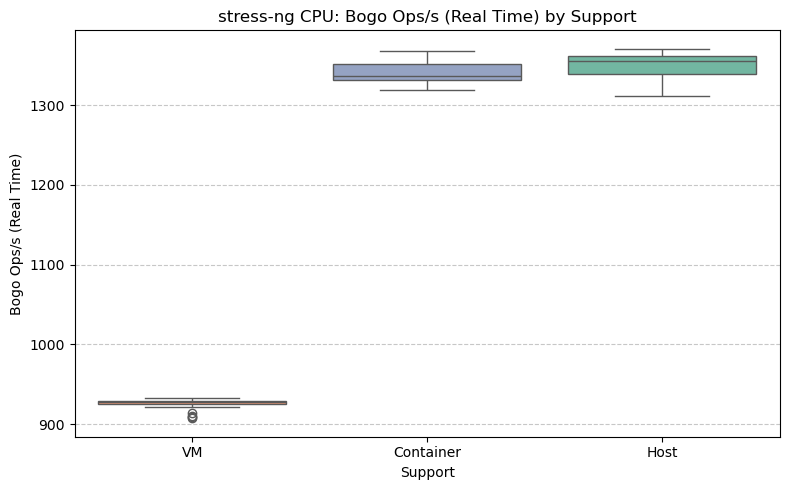

In [68]:
# Prepare data in long format for seaborn
df = pd.DataFrame({
    'Bogo Ops/s (Real Time)': pd.concat([
        vm_cpu['Bogo Ops/s (Real Time)'].astype(float),
        container_cpu['Bogo Ops/s (Real Time)'].astype(float),
        host_cpu['Bogo Ops/s (Real Time)'].astype(float)
    ], ignore_index=True),
    'Support': (['VM'] * len(vm_cpu)) + (['Container'] * len(container_cpu)) + (['Host'] * len(host_cpu))
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Support', y='Bogo Ops/s (Real Time)', data=df, palette=[palette[1], palette[2], palette[0]])
plt.title('stress-ng CPU: Bogo Ops/s (Real Time) by Support')
plt.ylabel('Bogo Ops/s (Real Time)')
plt.xlabel('Support')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# `sysbench`

In [24]:
sysbench_cpu = pd.read_csv('sysbench - cpu.csv')
sysbench_cpu.head()

,support,events_per_sec,total_time,total_events,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,453.61,10.0004,4537,2.03,2.20,7.37,2.35,9997.35,4537,0,9.9973,0
1,vm,454.32,10.0004,4544,2.04,2.20,6.75,2.35,9997.37,4544,0,9.9974,0
2,vm,454.85,10.0018,4550,2.03,2.20,5.18,2.35,9998.86,4550,0,9.9989,0
3,vm,455.40,10.0008,4555,2.03,2.19,8.29,2.35,9998.04,4555,0,9.9980,0
4,vm,451.09,10.0009,4512,2.06,2.22,6.20,2.39,9997.94,4512,0,9.9979,0


/tmp/ipykernel_61938/3643925363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette='Set2')


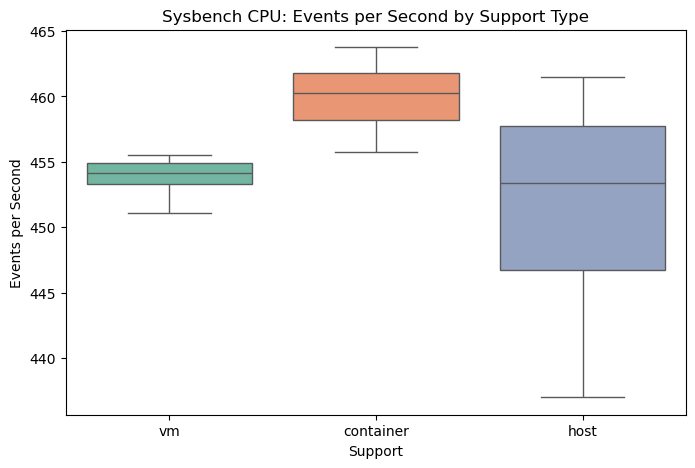

/tmp/ipykernel_61938/3643925363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette='Set2')


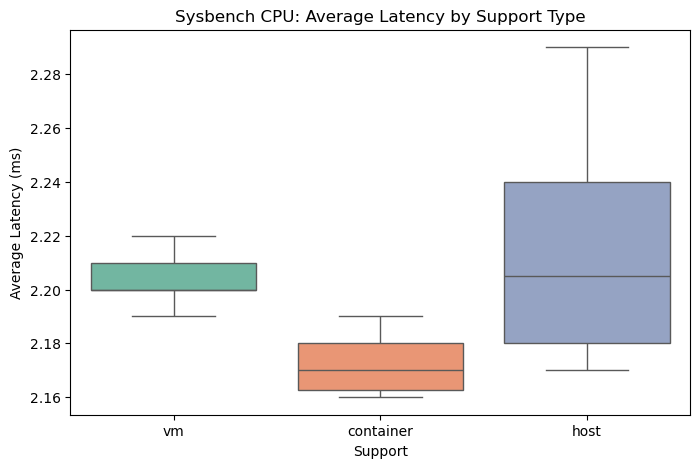

In [25]:
# Boxplot of events_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette='Set2')
plt.title('Sysbench CPU: Events per Second by Support Type')
plt.ylabel('Events per Second')
plt.xlabel('Support')
plt.show()

# Boxplot of latency_avg by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette='Set2')
plt.title('Sysbench CPU: Average Latency by Support Type')
plt.ylabel('Average Latency (ms)')
plt.xlabel('Support')
plt.show()

In [26]:
sysbench_memory = pd.read_csv('sysbench - memory.csv')
sysbench_memory.head()

,support,total_operations,ops_per_sec,transfer_mib,transfer_rate_mibs,total_time,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,10485760,4084237.70,10240,3988.51,2.5659,0,0,2.51,0,1063.98,10485760,0,1.0665,0
1,vm,10485760,4050951.60,10240,3956.01,2.5869,0,0,1.67,0,1072.58,10485760,0,1.0726,0
2,vm,10485760,4031061.30,10240,3936.58,2.5991,0,0,1.34,0,1077.06,10485760,0,1.0771,0
3,vm,10485760,4095310.05,10240,3999.33,2.5589,0,0,0.90,0,1059.26,10485760,0,1.0593,0
4,vm,10485760,4080990.49,10240,3985.34,2.5675,0,0,0.90,0,1062.70,10485760,0,1.0627,0


/tmp/ipykernel_61938/1856619762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette='Set2')


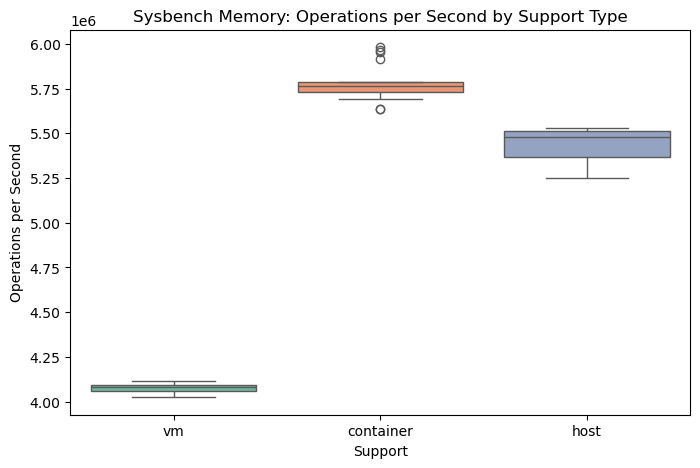

/tmp/ipykernel_61938/1856619762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette='Set2')


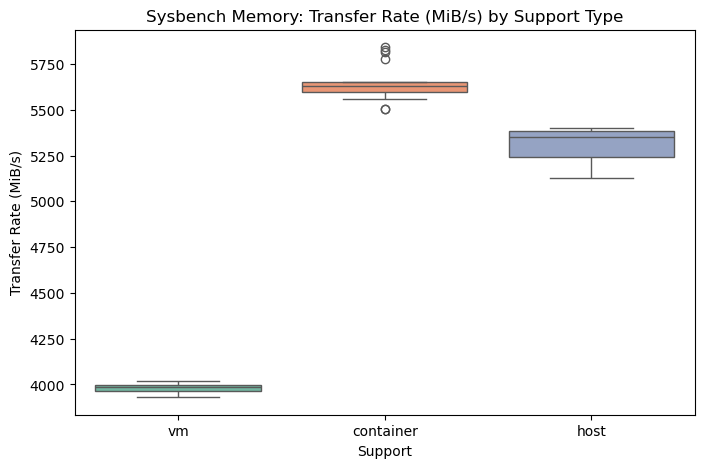

/tmp/ipykernel_61938/1856619762.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette='Set2')


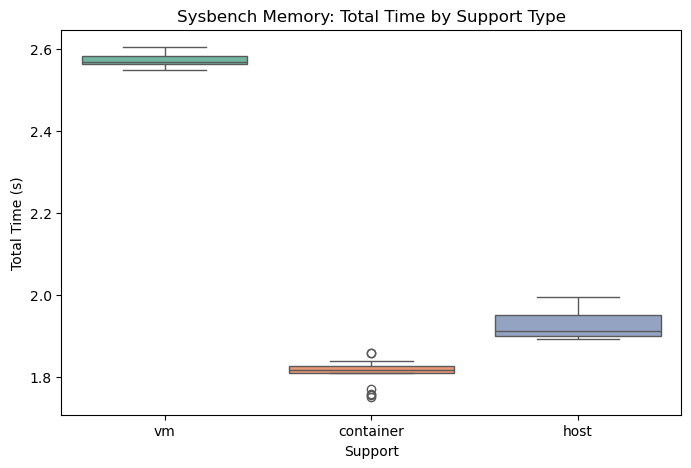

In [27]:
# Boxplot: ops_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Operations per Second by Support Type')
plt.ylabel('Operations per Second')
plt.xlabel('Support')
plt.show()

# Boxplot: transfer_rate_mibs by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Transfer Rate (MiB/s) by Support Type')
plt.ylabel('Transfer Rate (MiB/s)')
plt.xlabel('Support')
plt.show()

# Boxplot: total_time by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette='Set2')
plt.title('Sysbench Memory: Total Time by Support Type')
plt.ylabel('Total Time (s)')
plt.xlabel('Support')
plt.show()

# `iperf`

In [28]:
iperf_standard = pd.read_csv('iperf - standard.csv')
iperf_standard.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6
0,vm,node01,0.00-1.00,367.0,MBytes,3.08,Gbits/sec
1,vm,node01,1.00-2.00,385.0,MBytes,3.23,Gbits/sec
2,vm,node01,2.00-3.00,392.0,MBytes,3.29,Gbits/sec
3,vm,node01,3.00-4.00,398.0,MBytes,3.34,Gbits/sec
4,vm,node01,4.00-5.00,406.0,MBytes,3.41,Gbits/sec


In [29]:
# Define a mapping for metric prefixes to their decimal multipliers
prefix_multipliers = {
    'K': 1e3,
    'M': 1e6,
    'G': 1e9
}

# Helper function to convert value and unit to decimal
def convert_with_unit(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    unit = str(unit)
    for prefix, multiplier in prefix_multipliers.items():
        if unit.startswith(prefix):
            return float(value) * multiplier
    return float(value)

# Convert 'Transfer' and 'Bitrate' columns to decimal format
iperf_standard['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Transfer'], iperf_standard['Unnamed: 4'])
]
iperf_standard['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Bitrate'], iperf_standard['Unnamed: 6'])
]

# Drop the old columns and rename for clarity
iperf_standard = iperf_standard.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])

In [30]:
iperf_standard.head()

,Support,Link,Interval (sec),Transfer (Bytes),Bitrate (bits/sec)
0,vm,node01,0.00-1.00,367000000.0,3.080000e+09
1,vm,node01,1.00-2.00,385000000.0,3.230000e+09
2,vm,node01,2.00-3.00,392000000.0,3.290000e+09
3,vm,node01,3.00-4.00,398000000.0,3.340000e+09
4,vm,node01,4.00-5.00,406000000.0,3.410000e+09


/tmp/ipykernel_61938/1222710755.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')


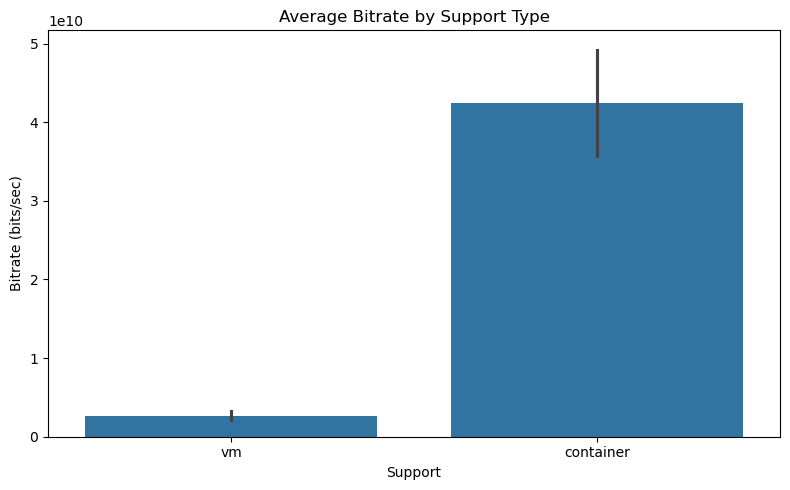

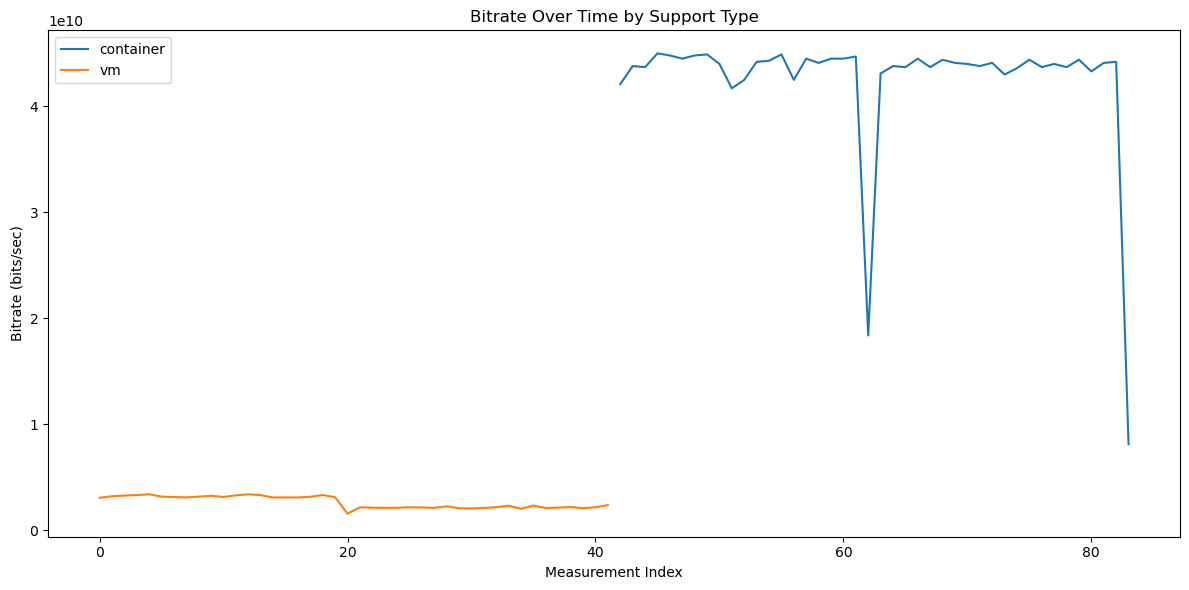

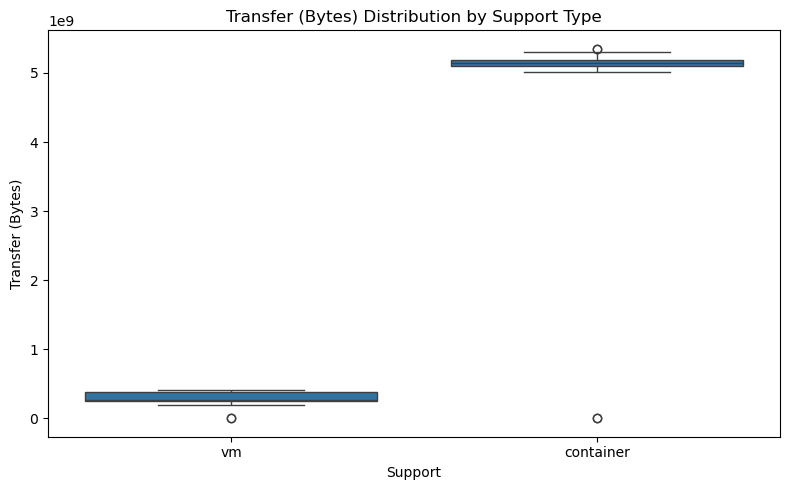

In [31]:
# Plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')
plt.title('Average Bitrate by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

# Plot Bitrate over time for each Support type
plt.figure(figsize=(12, 6))
for support, group in iperf_standard.groupby('Support'):
    plt.plot(group.index, group['Bitrate (bits/sec)'], label=support)
plt.title('Bitrate Over Time by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Measurement Index')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Transfer (Bytes) distribution by Support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Support', y='Transfer (Bytes)', data=iperf_standard)
plt.title('Transfer (Bytes) Distribution by Support Type')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

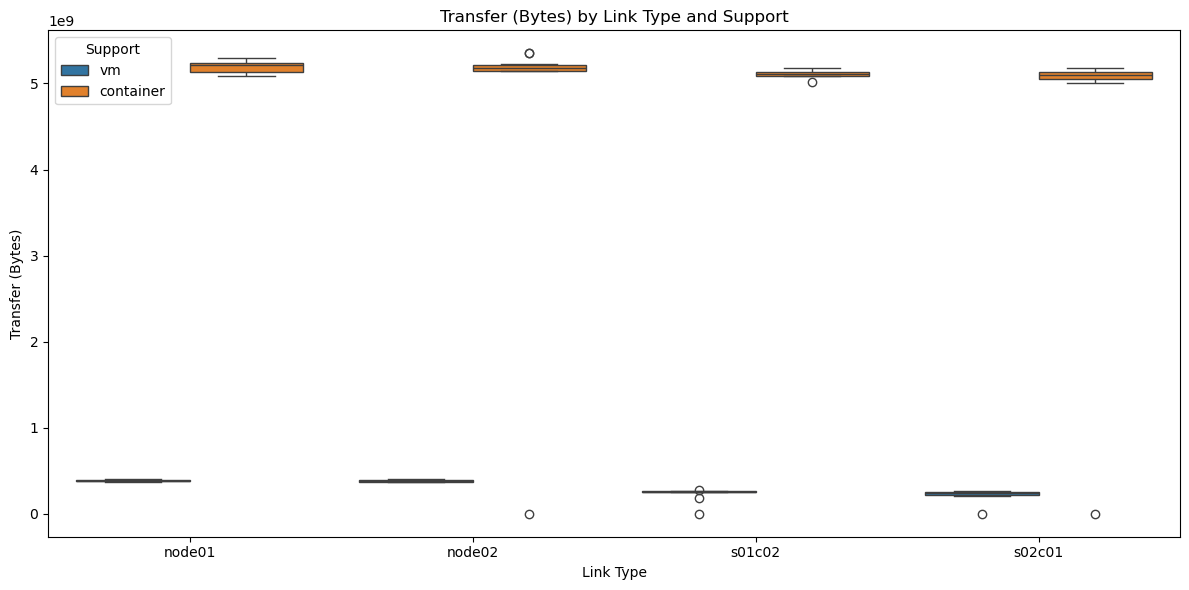

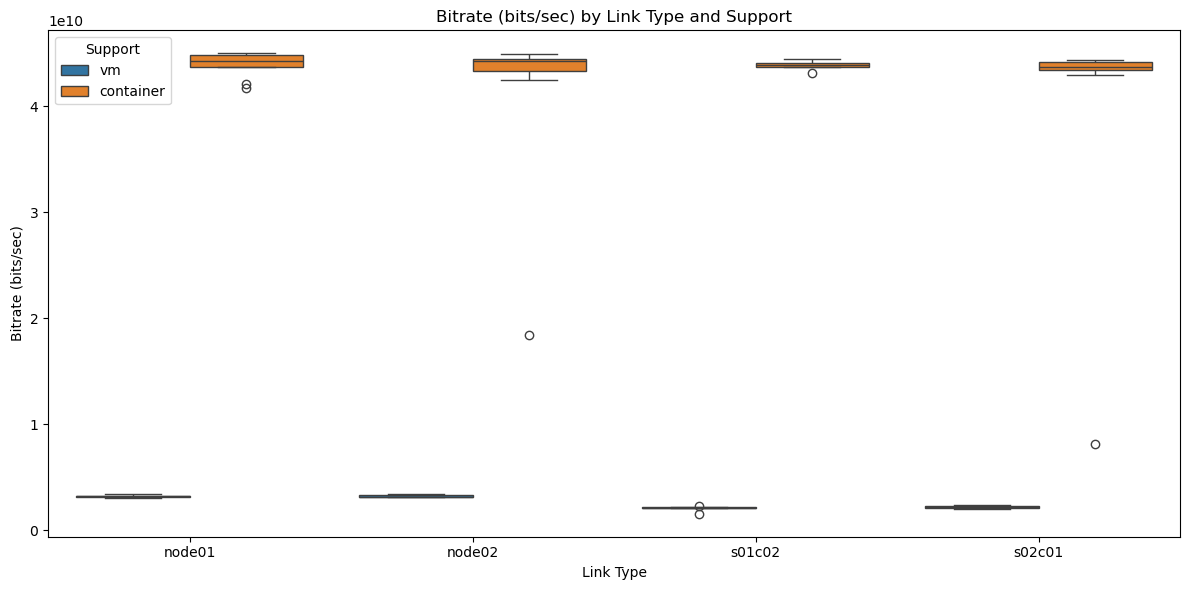

In [32]:
# Plot Transfer (Bytes) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Transfer (Bytes)', hue='Support', data=iperf_standard)
plt.title('Transfer (Bytes) by Link Type and Support')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Bitrate (bits/sec)', hue='Support', data=iperf_standard)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# `iozone`

## writer on shared folder

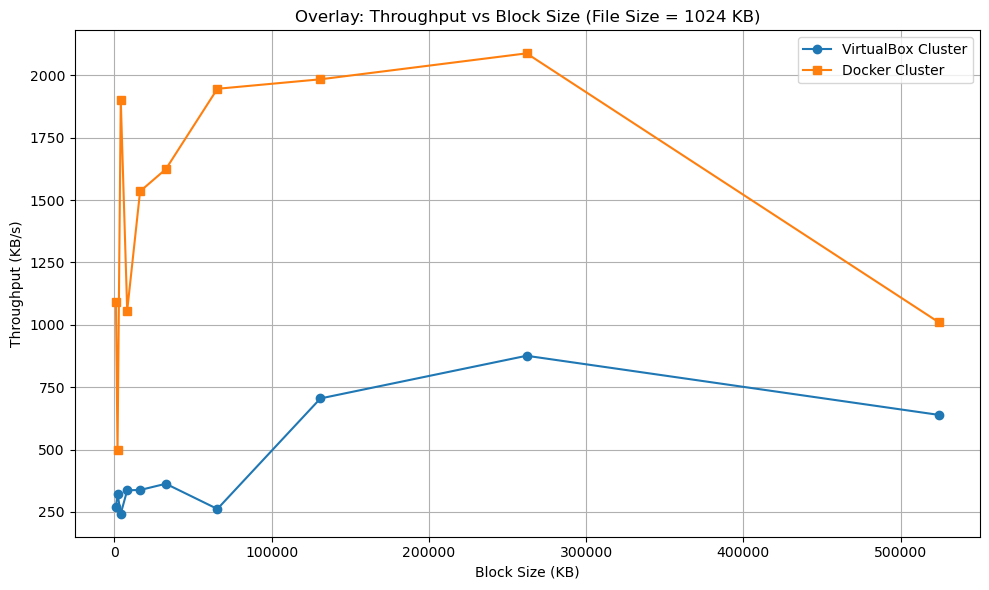

In [33]:
# Load both CSV files
vbox_df = pd.read_csv("vm_sh_writer_report.csv")
docker_df = pd.read_csv("doc_sh_writer_report.csv")

# Convert 'block_size' to index
vbox_df.set_index('block_size', inplace=True)
docker_df.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vbox_df.columns = vbox_df.columns.astype(str)
docker_df.columns = docker_df.columns.astype(str)

# ----------- Overlay Line Plot -----------
def plot_overlay(file_size="1024"):
    plt.figure(figsize=(10, 6))
    plt.plot(vbox_df.index, vbox_df[file_size], marker='o', label='VirtualBox Cluster')
    plt.plot(docker_df.index, docker_df[file_size], marker='s', label='Docker Cluster')
    plt.xlabel("Block Size (KB)")
    plt.ylabel("Throughput (KB/s)")
    plt.title(f"Overlay: Throughput vs Block Size (File Size = {file_size} KB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------- Run Plots -----------
plot_overlay(file_size="1024")


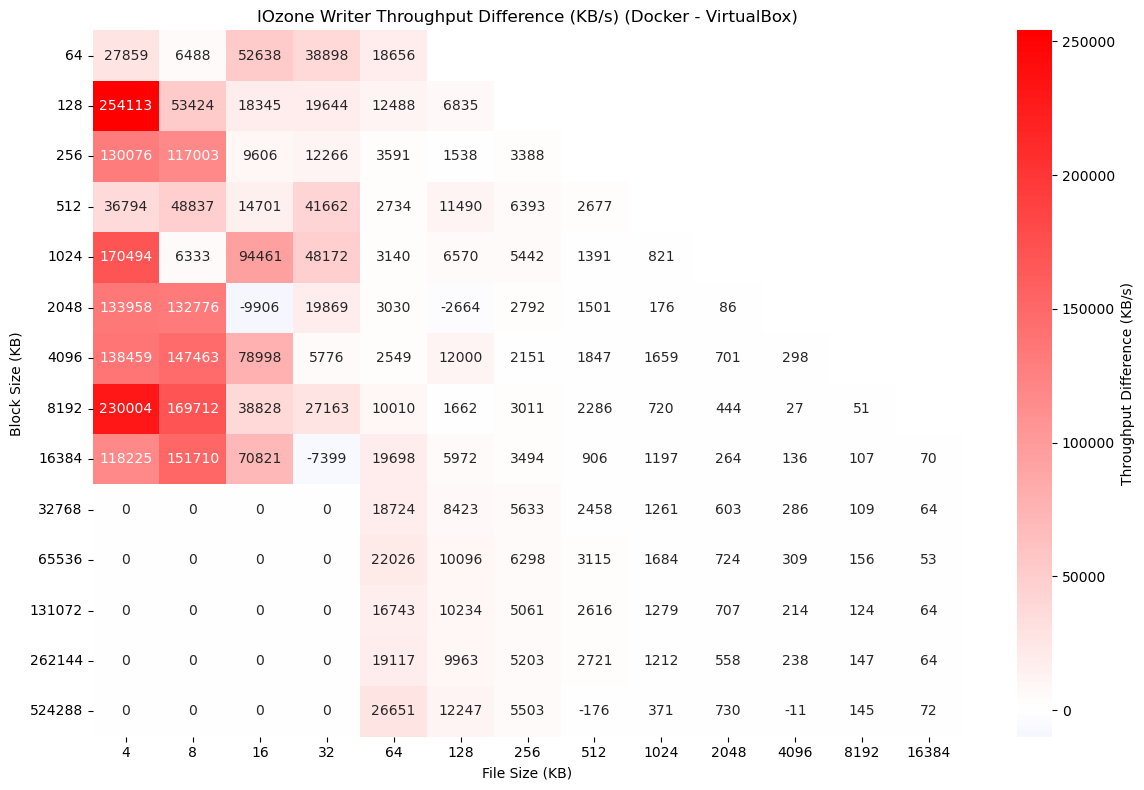

In [34]:
# Load CSV files
vbox_df = pd.read_csv("vm_sh_writer_report.csv")
docker_df = pd.read_csv("doc_sh_writer_report.csv")

# Set 'block_size' as the index
vbox_df.set_index('block_size', inplace=True)
docker_df.set_index('block_size', inplace=True)

# Convert all column headers to integers for sorting
vbox_df.columns = vbox_df.columns.astype(int)
docker_df.columns = docker_df.columns.astype(int)
vbox_df.index = vbox_df.index.astype(int)
docker_df.index = docker_df.index.astype(int)

# Sort rows and columns
vbox_df = vbox_df.sort_index().sort_index(axis=1)
docker_df = docker_df.sort_index().sort_index(axis=1)

# Calculate difference: Docker - VirtualBox
diff_df = docker_df.astype(float) - vbox_df.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(diff_df, cmap="bwr", center=0, annot=True, fmt=".0f",
            cbar_kws={'label': 'Throughput Difference (KB/s)'})
plt.title("IOzone Writer Throughput Difference (KB/s) (Docker - VirtualBox)")
plt.xlabel("File Size (KB)")
plt.ylabel("Block Size (KB)")
plt.tight_layout()
plt.show()


## write local

In [35]:
# Load both CSV files
vbox_loc = pd.read_csv("vm_loc_writer_report.csv")
docker_loc = pd.read_csv("doc_loc_writer_report.csv")
host_loc = pd.read_csv("host_loc_writer_report.csv")

In [36]:
# Convert 'block_size' to index
vbox_loc.set_index('block_size', inplace=True)
docker_loc.set_index('block_size', inplace=True)
host_loc.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vbox_loc.columns = vbox_loc.columns.astype(str)
docker_loc.columns = docker_loc.columns.astype(str)
host_loc.columns = host_loc.columns.astype(str)


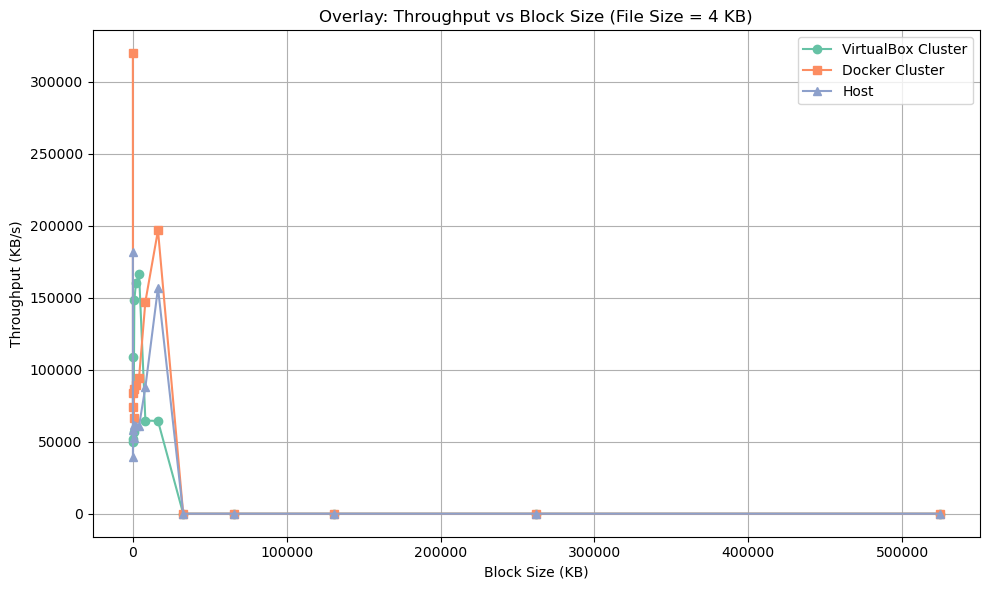

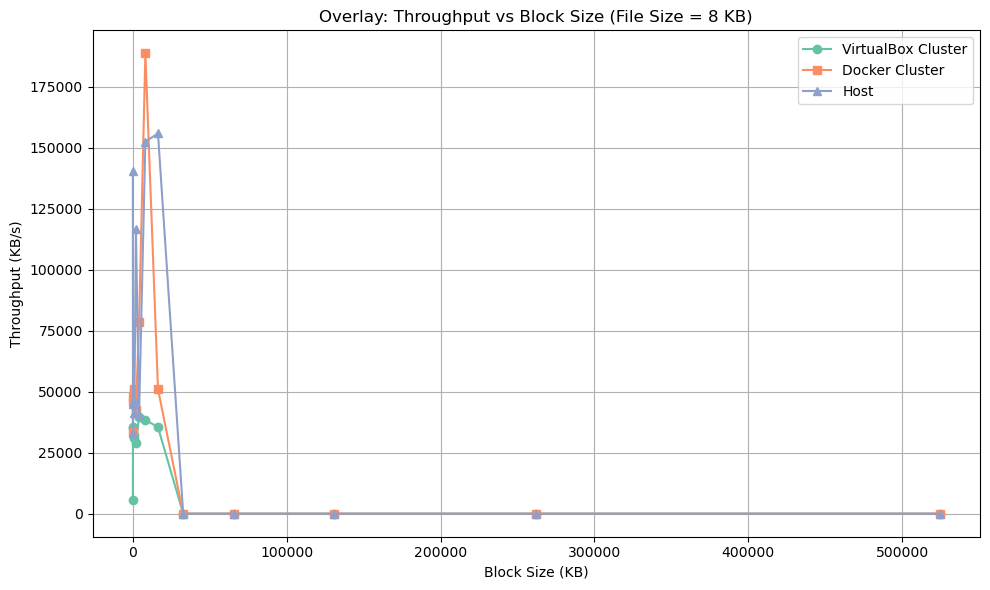

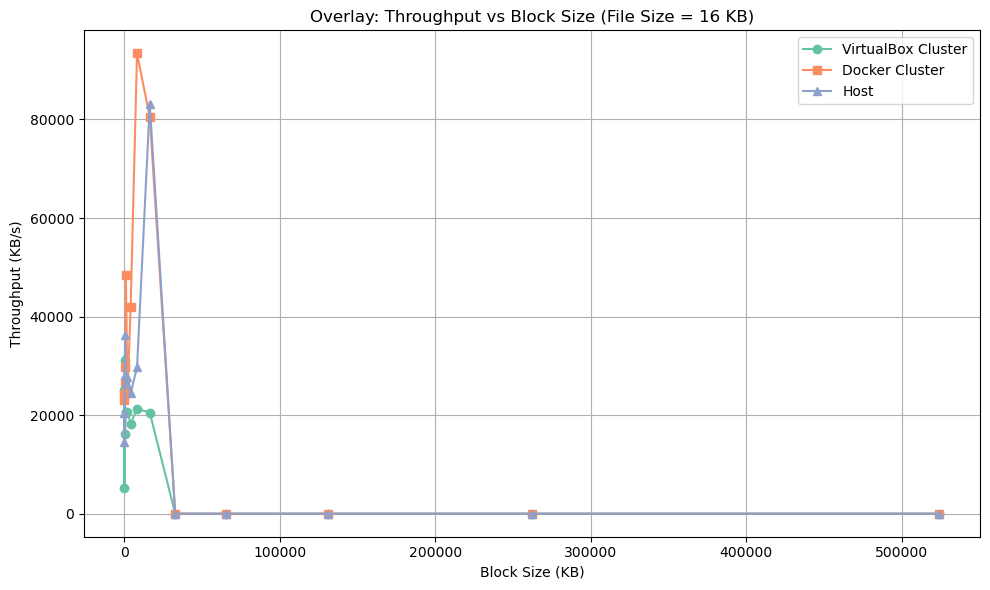

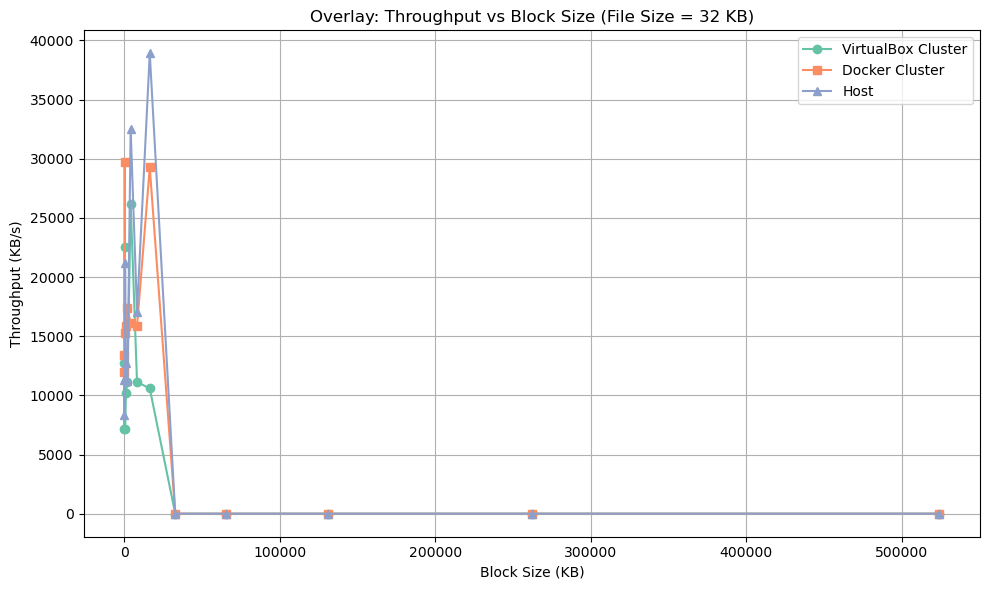

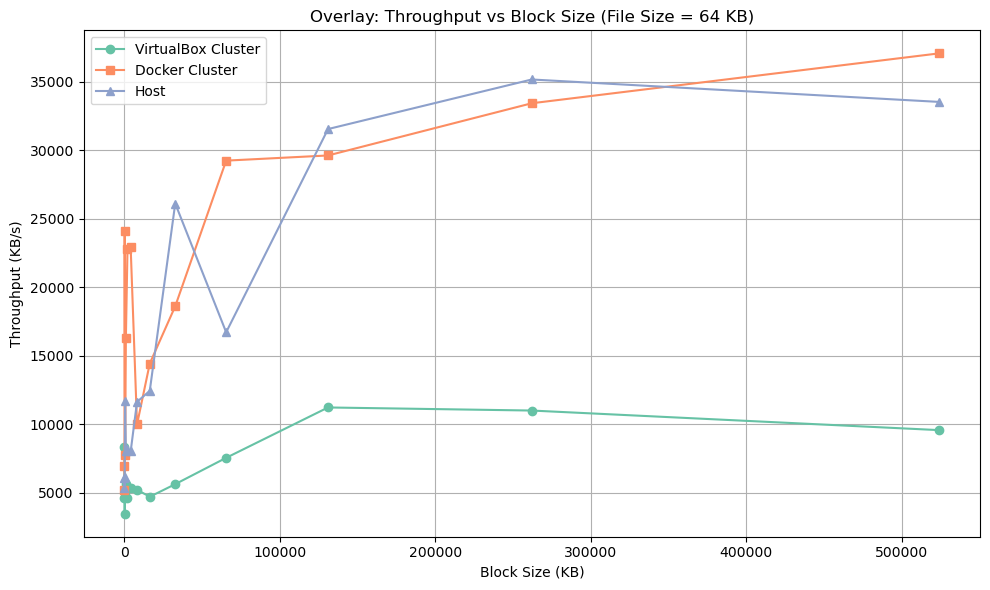

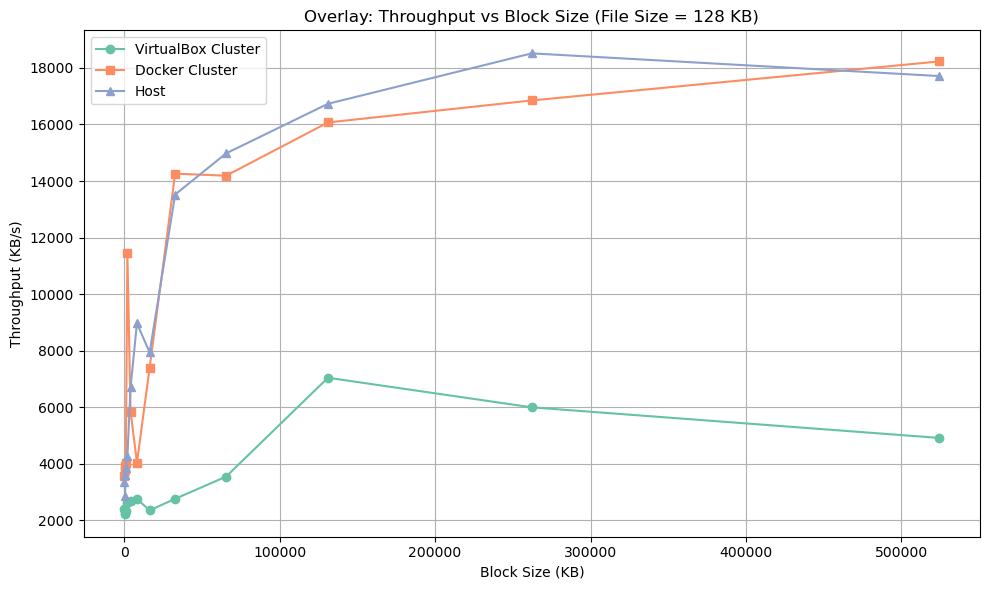

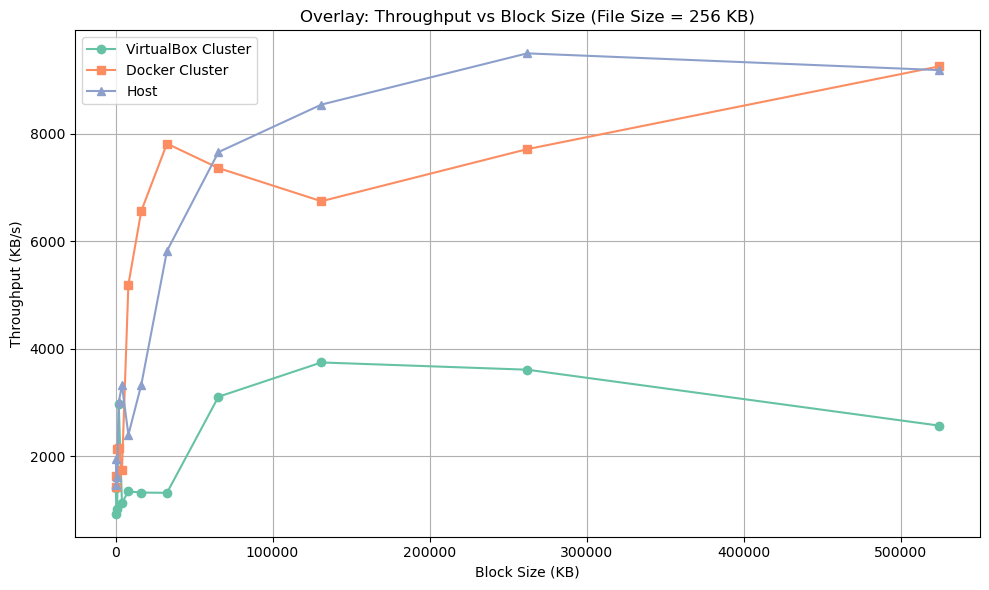

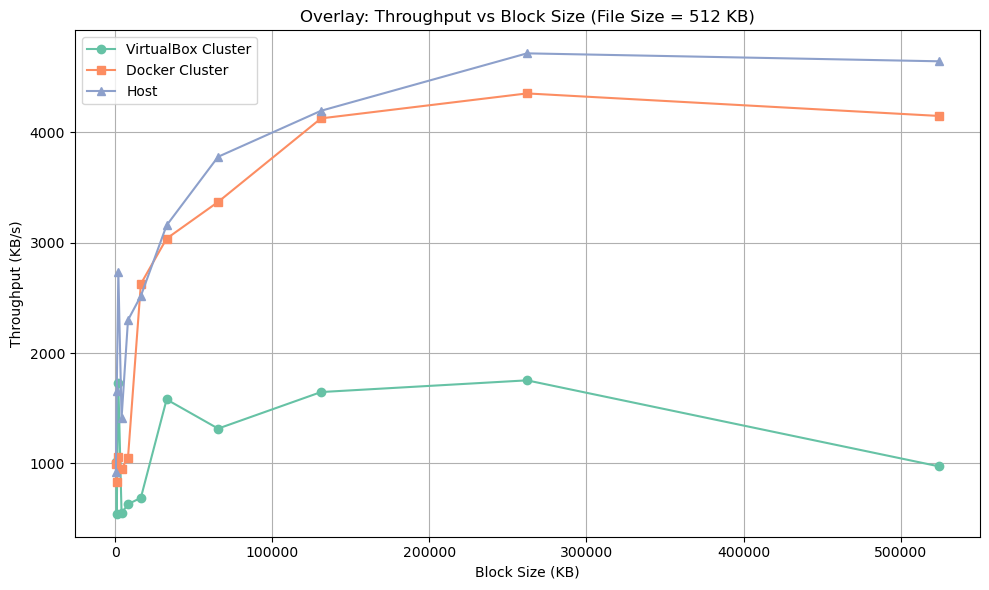

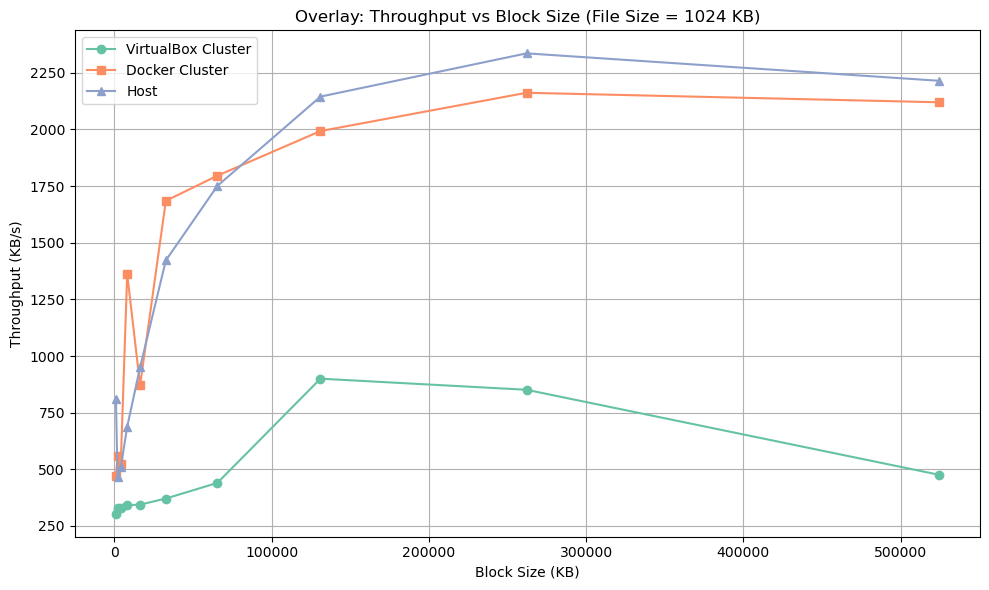

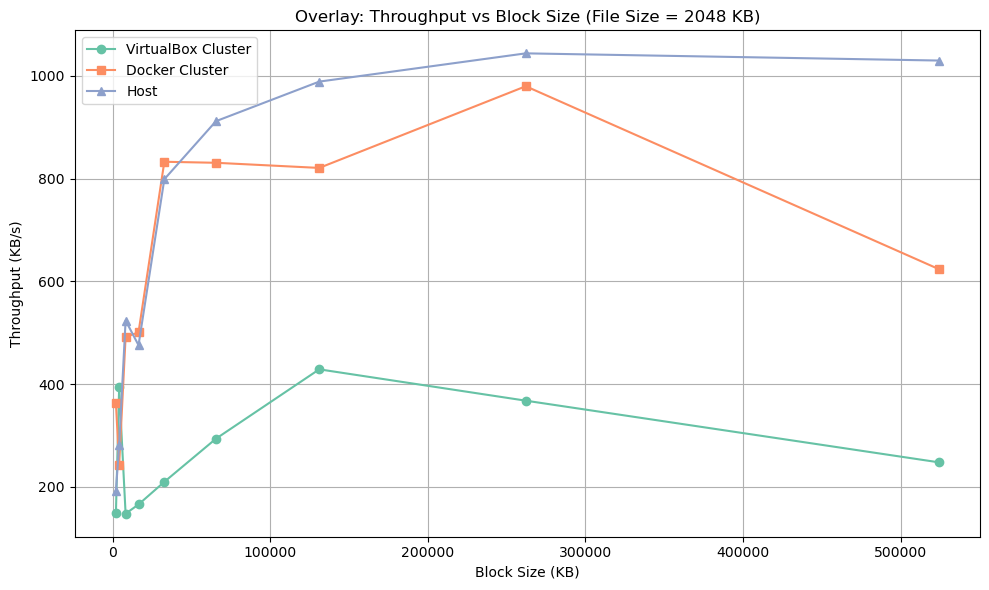

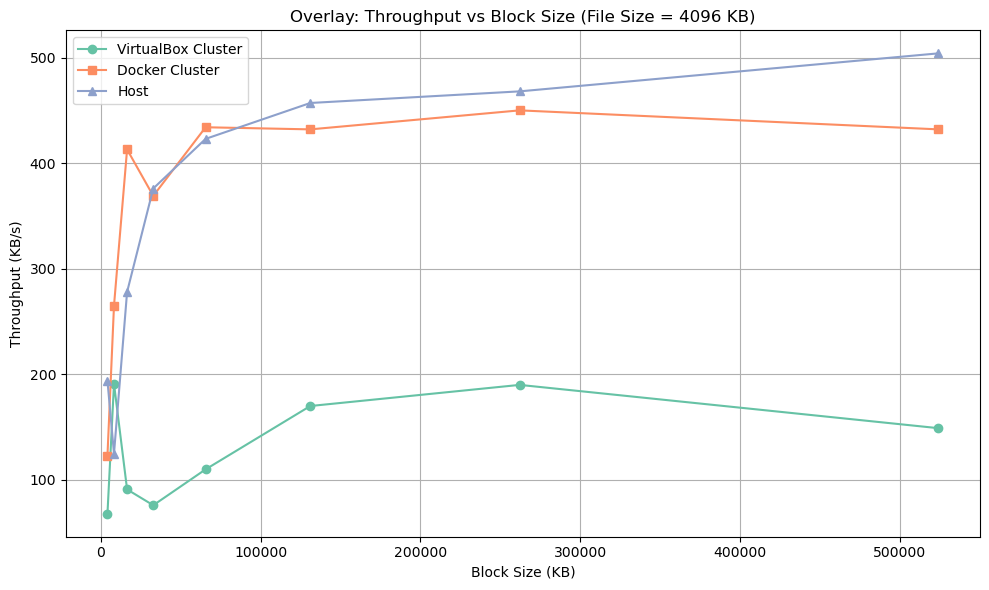

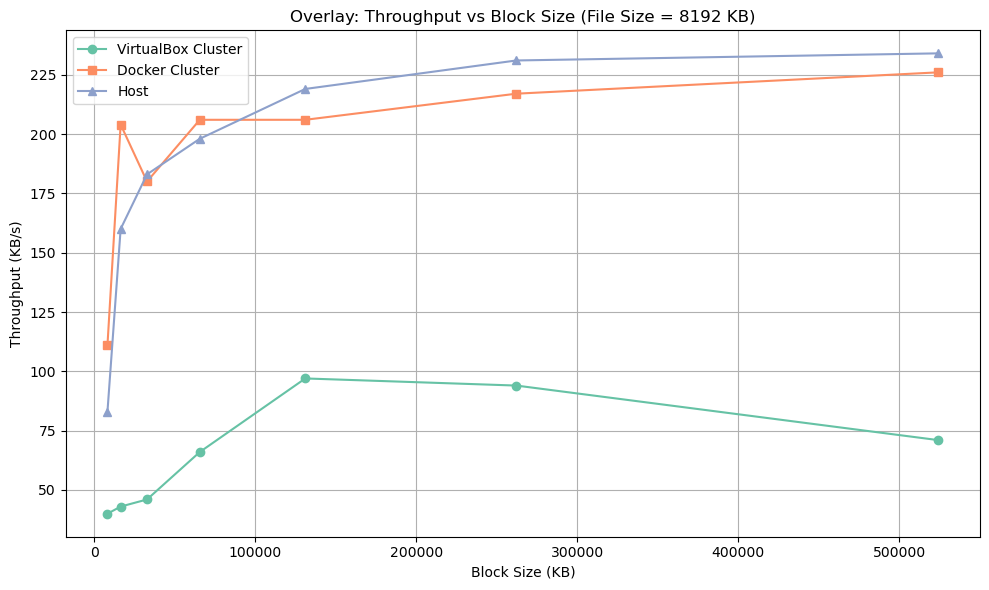

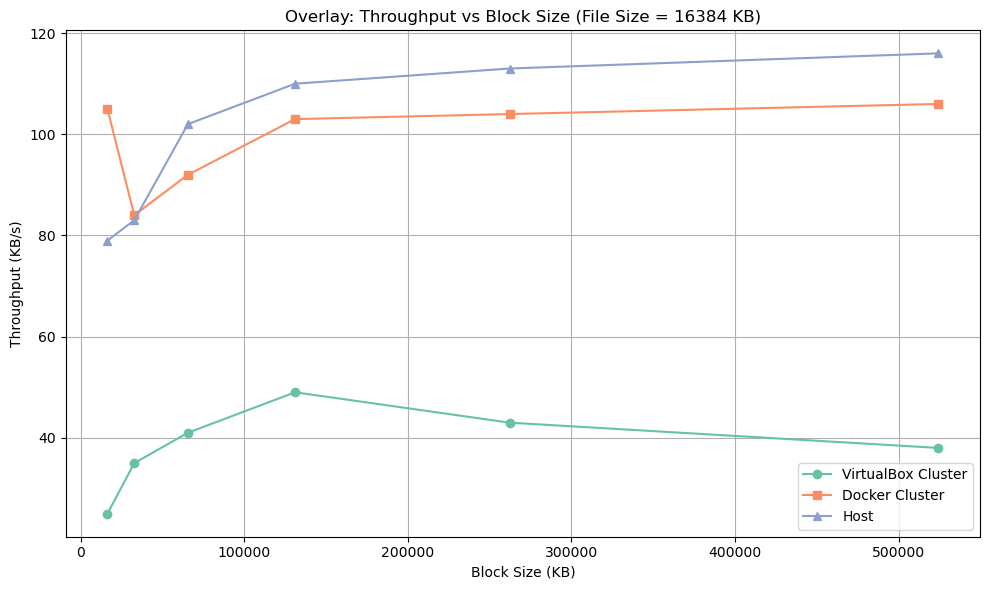

In [37]:

# ----------- Overlay Line Plot -----------
def plot_overlay(file_size="1024"):
    plt.figure(figsize=(10, 6))
    plt.plot(vbox_loc.index, vbox_loc[file_size], marker='o', label='VirtualBox Cluster', color=palette[0])
    plt.plot(docker_loc.index, docker_loc[file_size], marker='s', label='Docker Cluster', color=palette[1])
    plt.plot(host_loc.index, host_loc[file_size], marker='^', label='Host', color=palette[2])
    plt.xlabel("Block Size (KB)")
    plt.ylabel("Throughput (KB/s)")
    plt.title(f"Overlay: Throughput vs Block Size (File Size = {file_size} KB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------- Run Plots ----------- 


plot_overlay(file_size="4")
plot_overlay(file_size="8")
plot_overlay(file_size="16")
plot_overlay(file_size="32")
plot_overlay(file_size="64")
plot_overlay(file_size="128")
plot_overlay(file_size="256")
plot_overlay(file_size="512")
plot_overlay(file_size="1024")
plot_overlay(file_size="2048")
plot_overlay(file_size="4096")
plot_overlay(file_size="8192")
plot_overlay(file_size="16384")